# 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from glycowork.motif.draw import GlycoDraw
from glycowork.motif.analysis import get_pca

In [3]:
import pandas as pd
from glycowork.motif.analysis import get_differential_expression
from glycowork.motif.analysis import get_volcano
from glycowork.motif.draw import annotate_figure
from glycowork.motif.draw import GlycoDraw

In [4]:
data = {
    'Glycan': ['Gal(b1-3)GalNAc', 'GalOS(b1-3)GalNAc', 'Gal(b1-3)[Fuc(a1-?)]GalNAc', 'GlcNAc(b1-2)Man(a1-3)Man', 'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man', 'Neu5Ac(a2-3)Gal(b1-3)GalNAc'],
    'Sample1': [1.1, 0.2, 0.3, 0.5, 0.7, 1.0, 0.6],
    'Sample2': [1.2, 0.1, 0.2, 0.4, 0.8, 0.9, 0.5],
    'Sample3': [0.1, 1.8, 1.9, 0.3, 0.6, 0.8, 1.2],
    'Sample4': [0.2, 1.1, 1.2, 0.2, 0.5, 0.7, 1.1],
    'Sample5': [1.3, 0.3, 0.4, 0.6, 0.9, 1.1, 0.7],
    'Sample6': [1.4, 0.4, 0.5, 0.7, 1.0, 1.2, 0.8],
    'Sample7': [0.3, 1.9, 2.0, 0.4, 0.7, 0.9, 1.3],
    'Sample8': [0.4, 1.2, 1.3, 0.3, 0.6, 0.8, 1.2]
}
differential_glycomics_df = pd.DataFrame(data)

# Define the groups
group1 = ['Sample1', 'Sample2', 'Sample5', 'Sample6']
group2 = ['Sample3', 'Sample4', 'Sample7', 'Sample8']

differential_expression = get_differential_expression(df = differential_glycomics_df,
                            group1 = group1,
                            group2 = group2,
                            motifs = True,
                            feature_set = ['terminal1'],
                            paired = False,
                            min_samples = 0.1)

print(differential_expression)

You're working with an alpha of 0.0719947529118713 that has been adjusted for your sample size of 8.
Significance inflation detected. The CLR/ALR transformation possibly cannot handle this dataset. Consider running again with a higher gamma value.             Proceed with caution; for now switching to Bonferroni correction to be conservative about this.
                  Glycan  Mean abundance    Log2FC     p-val  corr p-val  \
1     Terminal_Fuc(a1-?)        9.127797  2.057206  0.000011    0.000076   
0   Terminal_GalOS(b1-3)        8.079171  2.534015  0.000317    0.002220   
5  Terminal_Neu5Ac(a2-6)        9.720869 -0.661693  0.001591    0.011138   
2  Terminal_GlcNAc(b1-2)        4.477741 -1.072096  0.001629    0.011405   
4     Terminal_Man(a1-6)        7.632513 -0.708826  0.003773    0.026412   
6     Terminal_Man(a1-?)       15.265025 -0.708826  0.003773    0.026412   
3  Terminal_Neu5Ac(a2-3)        9.219164  0.693211  0.004169    0.029183   
7     Terminal_Gal(b1-3)       17.53

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


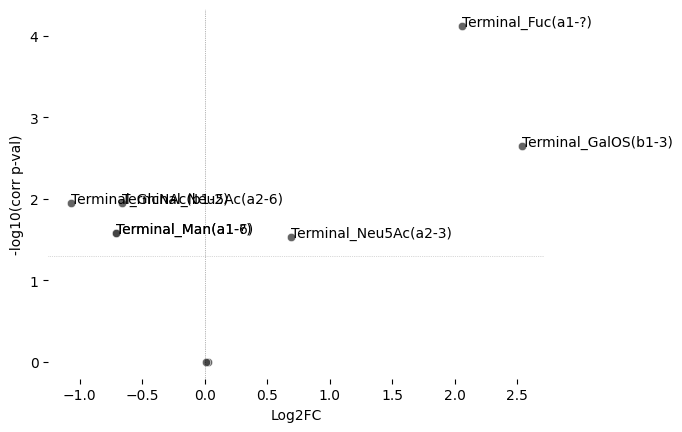

In [5]:
# Differential glycomics volcano plot
volcano = get_volcano(differential_expression,
                      y_thresh = 0.05,
                      annotate_volcano = True,
                      filepath = './volcano.svg')

In [6]:
annotate_figure('./volcano.svg',
               filepath = './volcano_annotated.pdf')

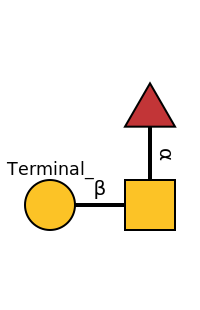

In [15]:
GlycoDraw('Terminal_Gal(b1-?)[Fuc(a1-?)]GalNAc')

In [24]:
data = {
    'Glycan': [
        'Gal(b1-3)GalNAc', 'GalOS(b1-3)GalNAc', 'Gal(b1-3)[Fuc(a1-?)]GalNAc',
        'GlcNAc(b1-2)Man(a1-3)Man', 'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
        'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man', 'Neu5Ac(a2-3)Gal(b1-3)GalNAc'
    ],
    'Sample1': [1.0, 0.5, 0.5, 0.6, 0.8, 0.9, 0.7],
    'Sample2': [1.1, 0.6, 0.4, 0.5, 0.7, 0.8, 0.6],
    'Sample3': [1.0, 0.5, 0.6, 0.7, 0.9, 1.0, 0.8],
    'Sample4': [1.1, 0.6, 0.5, 0.6, 0.8, 0.9, 0.7],
    'Sample5': [1.0, 0.5, 0.5, 0.6, 0.8, 0.9, 0.7],
    'Sample6': [1.1, 0.6, 0.4, 0.5, 0.7, 0.8, 0.6],
    'Sample7': [1.0, 0.5, 0.6, 0.7, 0.9, 1.0, 0.8],
    'Sample8': [1.1, 0.6, 0.5, 0.6, 0.8, 0.9, 0.7]
}
differential_glycomics_df_nonsignificant = pd.DataFrame(data)

# Define the groups
group1 = ['Sample1', 'Sample2', 'Sample5', 'Sample6']
group2 = ['Sample3', 'Sample4', 'Sample7', 'Sample8']

differential_expression_nonsignificant = get_differential_expression(differential_glycomics_df_nonsignificant,
                            group1 = group1,
                            group2 = group2,
                            motifs = True,
                            feature_set = ['terminal2'],
                            paired = False,
                            min_samples = 0.1)

print(differential_expression_nonsignificant)

ValueError: Length mismatch: Expected axis has 14 elements, new values have 7 elements

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


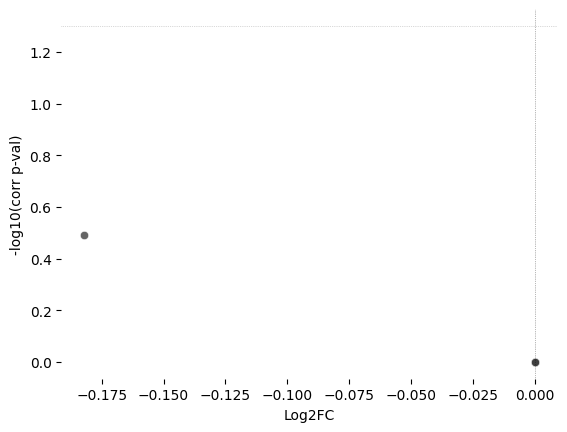

In [44]:
# Differential glycomics volcano plot
volcano_nonsignificant = get_volcano(differential_expression_nonsignificant,
           annotate_volcano = True,
                     filepath = './volcano_nonsignificant.svg',
                     y_thresh = 0.05)

In [45]:
annotate_figure('./volcano_nonsignificant.svg',
               filepath = './volcano_nonsignificant.pdf')

In [1]:
from glycowork.motif.analysis import get_heatmap
import pandas as pd

In [2]:
# Setup
from glycowork.motif.analysis import get_heatmap
import pandas as pd
data = {
    'Glycan': ['Gal(b1-3)GalNAc', 'GalOS(b1-3)GalNAc', 'Gal(b1-3)[Fuc(a1-?)]GalNAc', 'GlcNAc(b1-2)Man(a1-3)Man', 'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man', 'Neu5Ac(a2-3)Gal(b1-3)GalNAc'],
    'Sample1': [1.1, 0.2, 0.3, 0.5, 0.7, 1.0, 0.6],
    'Sample2': [1.2, 0.1, 0.2, 0.4, 0.8, 0.9, 0.5],
    'Sample3': [0.1, 1.8, 1.9, 0.3, 0.6, 0.8, 1.2],
    'Sample4': [0.2, 1.1, 1.2, 0.2, 0.5, 0.7, 1.1],
    'Sample5': [1.3, 0.3, 0.4, 0.6, 0.9, 1.1, 0.7],
    'Sample6': [1.4, 0.4, 0.5, 0.7, 1.0, 1.2, 0.8],
    'Sample7': [0.3, 1.9, 2.0, 0.4, 0.7, 0.9, 1.3],
    'Sample8': [0.4, 1.2, 1.3, 0.3, 0.6, 0.8, 1.2]
}
data = pd.DataFrame(data)

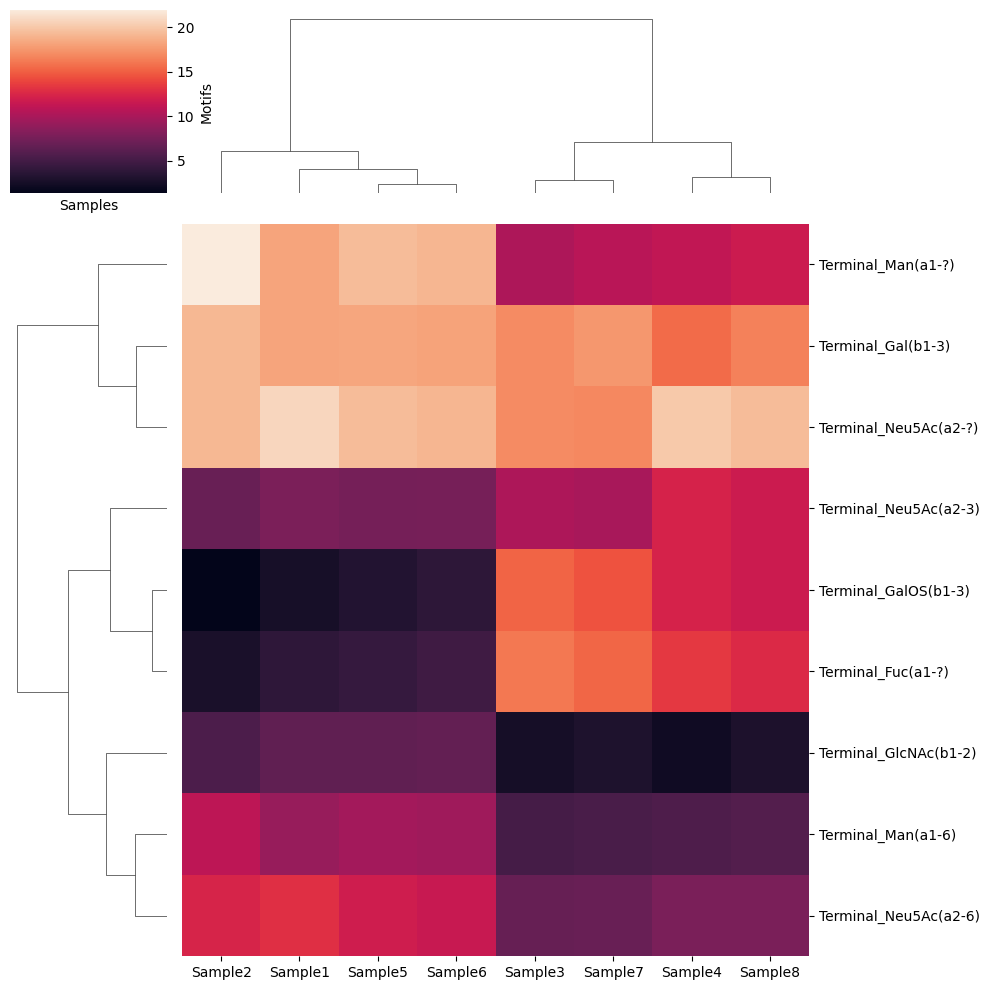

In [3]:
# This works
get_heatmap(data,
           motifs = True,
           feature_set=['terminal1'])

In [4]:
# This fails
get_heatmap(data,
           motifs = True,
           feature_set=['terminal2'])

ValueError: Length mismatch: Expected axis has 14 elements, new values have 7 elements

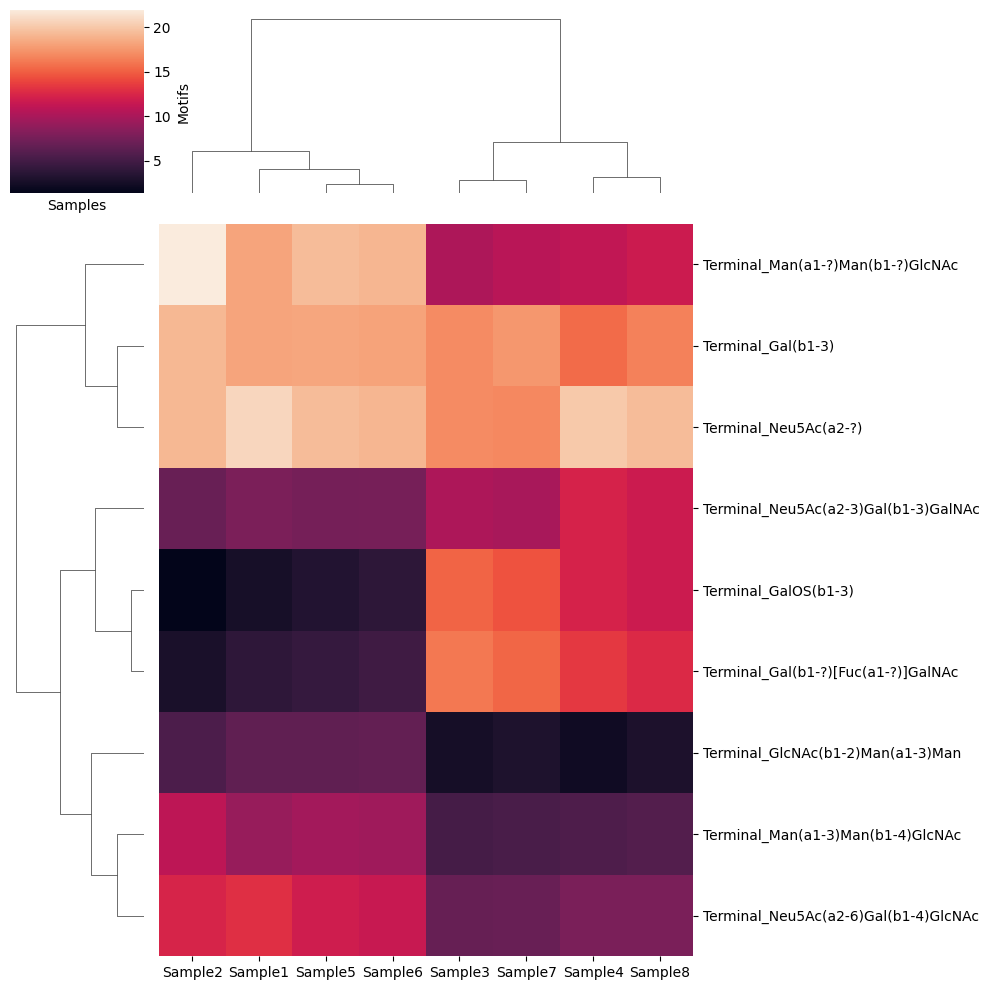

In [5]:
# This works
get_heatmap(data,
           motifs = True,
           feature_set=['terminal3'])

In [6]:
# This fails
get_heatmap(data,
           motifs = True,
           feature_set=['terminal1','terminal2','terminal3'])

ValueError: Length mismatch: Expected axis has 14 elements, new values have 7 elements